In [1]:
#import slm_utils
import pandas as pd
import config
import slm_utils
import figure_utils
import matplotlib.gridspec as gridspec
import miscellaneous_utils as mu
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('text', usetex=True)

#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

#matplotlib.verbose.level = 'debug-annoying'
        
import seaborn as sns
import numpy as np

from matplotlib.lines import Line2D

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import os

color_mood = ["#a63a33","#f1c132","#3c414d","#d7d7de","#aaaaaa"]

font = {'family': 'sans-serif',
        'color':  'k',
        'size': 40
        }
from statsmodels.tsa.stattools import adfuller

/tmp/ipykernel_236956/1976207190.py:25: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [2]:
def calculate_BH(spcs):
    pi_df_BH = pd.read_csv("/u/home/r/rwolff/strain_stability_revisions/strainstability/analysis/pi/HMP/HMP/%s_pi.txt" % spcs,index_col=0)
    
    Fst = {}
    for ind1 in pi_df_BH.index:
        for ind2  in pi_df_BH.index:
            if ind1 != ind2:
                pi_w1 = pi_df_BH.loc[ind1,ind1]
                pi_w2 = pi_df_BH.loc[ind2,ind2]
            
                Fst[(ind1,ind2)] = 1 - np.mean([pi_w1,pi_w2])/pi_df_BH.loc[ind1,ind2]
            
    return Fst

In [3]:
def return_Fst(host,spc):
    dates = mu.return_dates(host)
    all_samples = mu.return_host_samples(host)
    pi_dir = "%s/pi/Poyet/%s" % (config.analysis_directory,host)
    pi_df = pd.read_csv("%s/%s_pi.txt" % (pi_dir,spc),index_col=0)
    pi_df_T = pd.DataFrame(columns=all_samples,index=all_samples)
    pi_df_T.loc[pi_df.index,pi_df.columns] = pi_df
    species_dates = dates.loc[pi_df.index].sort_values()
    first_date = species_dates.index[0]
    pi_df_BT = pi_df_T.loc[first_date]
    pi_df_W = pd.Series(np.diag(pi_df_T),index=pi_df_BT.index)
    
    Fst = pd.Series(dtype='float64' )
    for ind in pi_df_BT.index:
        Fst.loc[ind] = 1 - ((pi_df_W.loc[first_date] + pi_df_W.loc[ind])/2)/pi_df_BT.loc[ind]
        
    return Fst

In [12]:
Fst_prime

,0,1,2,5,6,7,9,10,12,13,...,524,525,526,531,532,533,534,537,538,539
Phascolarctobacterium sp,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.215228,NaN,0.245431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.227824
Barnesiella intestinihominis,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.233814,NaN
Faecalibacterium prausnitzii (57453),NaN,0.000000,NaN,NaN,NaN,0.152622,NaN,NaN,NaN,0.133827,...,NaN,NaN,NaN,NaN,0.168169,0.169560,NaN,NaN,NaN,NaN
Ruminococcus bromii,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,-0.027661,0.120729,0.031920,...,NaN,NaN,NaN,NaN,0.141016,0.205669,0.148283,NaN,NaN,0.186477
Bacteroides uniformis,0.0,0.091515,0.164665,0.107641,0.086922,0.000426,0.096977,0.076864,0.080768,0.098190,...,0.107232,0.059937,0.052184,0.194990,0.051818,0.067002,0.076121,0.069867,0.045862,0.026736
Ruminococcus bicirculans,NaN,0.000000,0.149424,NaN,NaN,0.144203,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bacteroides xylanisolvens,0.0,0.323184,0.390183,0.480723,0.451580,0.275598,0.432252,0.422328,0.379837,0.306982,...,0.483763,0.380990,0.414060,0.547516,0.416531,0.455478,0.474201,0.342190,0.318860,0.337504
Eubacterium rectale,0.0,-0.008379,NaN,NaN,NaN,-0.067507,NaN,0.035081,-0.005015,-0.089932,...,NaN,NaN,NaN,-0.011911,-0.017444,0.086148,-0.052108,0.188725,0.037714,0.058148
Bacteroides ovatus,0.0,0.159239,0.198802,0.266359,0.219076,0.116496,0.245109,0.214821,0.202504,0.143635,...,0.390104,0.278694,0.298013,NaN,0.368854,0.397492,0.526176,0.220777,0.208240,0.262248
Phocaeicola vulgatus,0.0,0.012305,0.087146,0.067166,0.076869,0.033805,0.066558,0.062887,0.151344,0.288303,...,0.073645,0.071986,0.085463,0.091028,0.088229,0.062662,0.045624,0.079854,0.039221,0.048785


In [78]:
H_all = {}
ts_all = {}
F_st_all = {}
for host in ["am","an","ae","ao"]:
    
    dates = mu.return_dates(host)
    
    pi_dir = "%s/pi/Poyet/%s" % (config.analysis_directory,host)

    good_species = [s[:-7] for s in os.listdir(pi_dir)]

    all_samples = dates.index
    
    Fst_prime = pd.read_csv(f"fst_{host}.csv",index_col=0)
    Fst_prime.columns = np.array(Fst_prime.columns).astype(int)
    Fst_prime = Fst_prime.astype(float)
    
    H = {}
    ts = {}
    for s in Fst_prime.index:
        st = s
        y = Fst_prime.loc[s].dropna()
        H[st] = adfuller(y.values[1:])[1]
        ts[st] = (y.index,y.values)
    
    H_all[host] = H
    ts_all[host] = ts
    F_st_all[host] = Fst_prime

In [14]:
for h in F_st_all.keys():
    F_st_all[h].index = [figure_utils.get_pretty_species_name(s) for s in F_st_all[h].index]
    F_st_all[h] = F_st_all[h][mu.return_dates(h).index]
    F_st_all[h].columns = mu.return_dates(h).values

IndexError: list index out of range

In [6]:
host = "ao"

for host in ["ao","am","an","ae"]:
    F_st_all[host].columns = dates = mu.return_dates(host)
    F_st_all[host].to_csv("fst_%s.csv" % host)

In [7]:
f = 0
s = 0
for host in ["am","ao","an","ae"]:
    f+=(pd.Series(H_all[host]) > .05).sum()
    s+=pd.Series(H_all[host]).shape[0]
1 - (1.0*f)/s

0.7555555555555555

In [8]:
f

11

In [9]:
(pd.Series(H_all["am"]) < .05).sum()

12

In [10]:
pd.Series(H_all["am"]).shape[0]

13

In [11]:
(s-f)/(1.0*s)

0.7555555555555555

In [12]:
# fig,axs = plt.subplots(2,2,figsize=(12,6))

# axs = axs.ravel()

# i = 0
# for host in ["am","ao","an","ae"]:
#     axs[i].set_title(host,size=20)
#     for k in ts_all[host]:
#         if H_all[host][k] > .05:
#             axs[i].plot(ts_all[host][k][0],ts_all[host][k][1],color="red",lw=4)
#         else:
#             axs[i].plot(ts_all[host][k][0],ts_all[host][k][1],color="grey")

#     axs[i].set_ylim([-.25,1.75])
    
#     axs[i].axhline(1,ls="--")
#     axs[i].text(1, 1.1, r"Inter-host ${F_{ST}}'$", fontsize = 15,color="k")

#     i += 1

# fig.text(0.05,.475,r"$F_{ST}'$",size=20)
# fig.text(.475,.05,"Time (days)",size=20)

In [47]:
def plot_fst(ts_all,host,species=None,fst_fig=None,spec=None,ij=0):
 
    species_full = figure_utils.get_pretty_species_name(species)

    ts_plot = ts_all[host]
    dates = mu.return_dates(host)
    
    if fst_fig == None:
        fst_fig = plt.figure(constrained_layout=True,figsize=(24,6))
    
        gs = fst_fig.add_gridspec(1, 10)

        axs = fst_fig.add_subplot(gs[0, :-1])
        axs_null = fst_fig.add_subplot(gs[0, -1:])
     
    else:
        axs = fst_fig.add_subplot(spec[ij, :-1])
        axs_null = fst_fig.add_subplot(spec[ij, -1:])
              
    axs_null.axis('off')
    axs.set_xlim([-4,dates.iloc[-1] + 4])

    if species == None:
                
        for spc in ts_plot.keys():
            d,spc_frq = ts_plot[spc]
            
            axs.plot(d,spc_frq,label=spc,lw=4)
            axs.scatter(d,spc_frq,color="k",s=20,zorder=100)
            
        axs.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0),ncol=1, fancybox=True, shadow=True,prop={'size': 20,'style':'italic'})
        axs.set_xlabel("Time (days)",fontdict=font)
        axs.set_title(host,fontdict=font,fontstyle="italic",fontweight="bold")
        #axs.semilogy()
        axs.text(1, .7, r"Inter-host ${F_{ST}}'$", fontsize = 25,color="red")
        
    if species != None:
        
       # for spc in ts_plot.keys():
       #     d,spc_frq = ts_plot[spc]

       #     axs.plot(d,spc_frq,label=None,lw=1,color="grey",alpha=.5)
       #     axs.scatter(d,spc_frq,color="k",s=15,zorder=10,alpha=.5)
        
        #(Fst_plot.T).plot(ax=axs,label=None,color="grey",legend=None,lw=3,alpha=.7); 
        x,y =  ts_plot[species_full]
        x = np.array(x)
        y = np.array(y)

#         good_idxs = ~np.isnan(y)
        
#         x = x[good_idxs]
#         y = y[good_idxs]
        
        axs.plot(x,y,color="#378293",label=figure_utils.get_abbreviated_species_name(species),zorder=10,lw=10);
        axs.plot(x,y,color="k",zorder=9,lw=12);

        axs.set_xlabel("",fontdict=font)
        #axs.scatter(x,y,color="k",s=30,zorder=100)
        axs.set_title(r"$\textit{%s}$" % figure_utils.get_abbreviated_species_name(species),size=60,fontstyle="italic",fontweight="bold")
        #axs.set_title(r"$\textit{%s}$" % figure_utils.get_abbreviated_species_name(species),size=60,fontstyle="italic")
      
        axs.set_xticks([])
        axs.set_xticklabels([])
        #axs.set_ylim([.5*1e-1,max(1.9,1.2*(Fst_plot.loc[species].max()))])
        axs.text(1, 1.05, r"Inter-host $\boldsymbol{{F_{ST}}'}$", fontsize = 40,color="red")
        #axs.semilogy()
        
    #axs.scatter(dates.values,Fst_plot.loc[species].values,color="k",s=50,zorder=1000);
    
    #
    
    
    axs.axhline(1,color="red",lw=2)
    
    axs.set_ylabel(r"$\boldsymbol{{F_{ST}}'}$",fontdict=font,labelpad=25)

    #axs.tick_params(axis='both', which='major', labelsize=15)
    #axs.tick_params(axis='both', which='major', labelsize=15)

    axs.spines['left'].set_linewidth(1)
    axs.spines['bottom'].set_linewidth(1)
    axs.spines['right'].set_linewidth(1)
    axs.spines['top'].set_linewidth(1)
  
    axs.tick_params('both', length=4, width=2, which='major',labelsize=25)
    axs.tick_params('both', length=2, width=2, which='minor')
    
    #axs.set_yticklabels(axs.get_yticks(), weight='bold')
    #axs.set_xticklabels(axs.get_xticks(), weight='bold')
    
    #axs.grid(True,alpha=1)
   
    

    #axs.set_xticks([])
    #axs.set_xticklabels([])
    #axs.tick_params(axis='y', which='major', labelsize=20,bottom="off")
     
    axs.set_ylim([-.25,1.5])
        
    return axs

In [48]:
def plot_snv_fig(chosen_strain,host,species,snv_fig=None,spec=None,ij=1):   
  
    if snv_fig == None:
        snv_fig = plt.figure(constrained_layout=True,figsize=(16,12))
    
        gs = snv_fig.add_gridspec(0, 10)

        axs= snv_fig.add_subplot(gs[0, :-1])
        axs_null = snv_fig.add_subplot(gs[0, -1:])
 
    else:
        axs = snv_fig.add_subplot(spec[ij, :-1])
        axs_null = snv_fig.add_subplot(spec[ij, -1:])        

    axs_null.axis('off')
    
    axs.set_ylabel("SNV\nfrequency",fontdict=font,labelpad=25,multialignment='center') 
    axs.spines['left'].set_linewidth(1)
    axs.spines['bottom'].set_linewidth(1)
    axs.spines['right'].set_linewidth(1)
    axs.spines['top'].set_linewidth(1)
  
    axs.tick_params('both', length=3, width=2, which='major',labelsize=25)
    axs.tick_params('both', length=3, width=2, which='minor')
    #axs.grid(True,alpha=1)    

    axs.set_xticklabels([])
    #axs.tick_params(axis='both', which='major', labelsize=15)

    analysis_dir = config.analysis_directory
    cluster_dir = "%s/clusters/Poyet/%s/%s" % (analysis_dir,host,species)
    strain_snv_dic = {}
    strain_centroid_dic = {}
    
    i = 1
    for strain in os.listdir(cluster_dir):

        df = pd.read_csv("%s/%s" % (cluster_dir,strain),index_col=0)
        strain_snv_dic[i] = df
        strain_centroid_dic[i] = df.median()

        i+=1

    if len(strain_centroid_dic) == 1:
        strain_snv_dic[2] = 1 - strain_snv_dic[1]
        strain_centroid_dic[2] = 1 - strain_centroid_dic[1]
    
    #else:
    #    strain_snv_dic[3] = 1 - strain_snv_dic[3]
    #    strain_centroid_dic[3] = 1 - strain_centroid_dic[3]

    letter_list = ["A","B","C"]

    dates = mu.return_dates(host)
    
    dates = dates.loc[strain_snv_dic[1].columns].sort_values()

    axs.set_xlim([-4,dates.iloc[-1] + 4])
    
    strain_lines = []

    i = 0
    for strain in strain_centroid_dic:

        if letter_list[i] == chosen_strain:
            xx = 5000
            yy = .01
            lww = 2
            C = strain_snv_dic[strain].sample(min(strain_snv_dic[strain].shape[0],xx)).T.values
            axs.plot(dates.values,strain_centroid_dic[strain],color="k",label=letter_list[i],lw=4,alpha=.75,zorder=10);
            axs.plot(dates.values,C,lw=lww,color="#378293",alpha=yy);
            strain_line = Line2D([0], [0], label=letter_list[i], color=color_mood[i])
            strain_lines.append(strain_line)
            
        else:
            xx = 2500
            yy = .01
            lww = 2
            C = strain_snv_dic[strain].sample(min(strain_snv_dic[strain].shape[0],xx)).T.values
            axs.plot(dates.values,C,lw=lww,color="grey",alpha=yy);
            axs.plot(dates.values,strain_centroid_dic[strain],color="k",label=letter_list[i],lw=2,alpha=.75,zorder=10);
            strain_line = Line2D([0], [0], label=letter_list[i], color=color_mood[i])
            strain_lines.append(strain_line)
            
        #C = strain_snv_dic[strain].sample(min(strain_snv_dic[strain].shape[0],xx)).T.values

        #axs.plot(dates.loc[species_samples[25:45]].values,C[25:45],lw=1.5,color=color_mood[i],alpha=50*yy);

        i+=1
        
    axs.set_xticks([])
    plt.subplots_adjust(wspace=0.01, hspace=0);

In [49]:
def plot_slm_fig(host,species,chosen_strain,fig3=None,spec=None,ij=2):
        
    df = pd.read_csv("strains_%s.csv" % host,index_col=0) 
    dates = mu.return_dates(host)
    
    strain = "%s_%s" % (species,chosen_strain)
    obs_data = df.loc[strain]
    obs_data = obs_data[obs_data.notna()]

    dates = dates.loc[obs_data.index].sort_values()

    obs_data = obs_data.loc[dates.index]
    
    train_num = len(obs_data)//3

    params = slm_utils.fit_SLM_params(obs_data,n=train_num)

    ## initialize SLM 
    S = slm_utils.slm(sigma=params["sigma"],K=params["K"],tau=1,delta_t=1.0/100,init_val=obs_data[0])
    S.run_sim(num_iters=int(dates.iloc[-1]/S.delta_t),num_reps=4000,record_steps=True);
    
    if fig3 == None:
        fig3 = plt.figure(constrained_layout=True,figsize=(16,12))
        
        gs = fig3.add_gridspec(1, 10)

        f3_ax1 = fig3.add_subplot(gs[0, :-1])
        f3_ax1_H = fig3.add_subplot(gs[0, -1:])
    
    else:
        f3_ax1 = fig3.add_subplot(spec[ij, :-1])
        f3_ax1_H = fig3.add_subplot(spec[ij, -1:])                
    
    #f3_ax1.semilogy()
    #f3_ax1_H.semilogy();

    #f3_ax1.grid(True,alpha=1)
    #f3_ax1.set_xlabel("Time (days)",fontdict=font)
    f3_ax1.set_xticks([])
    f3_ax1.set_ylabel("Strain\nfrequency",fontdict=font,labelpad=25,multialignment='center') 

    f3_ax1.plot(dates.values,obs_data.values,"-",color="#378293",lw=6,zorder=100)
    f3_ax1.plot(dates.values,obs_data.values,"-",color="k",lw=8,zorder=99)

    #f3_ax1.scatter(dates.values,obs_data.values,s=40,color="k",edgecolor="k",linewidths=1,zorder=101)

    #f3_ax1.axhline(upper_bound ,color="k",lw=.25)
    #f3_ax1.axhline(lower_bound,color="k",lw=.25)

    f3_ax1.set_xlim([-4,dates.iloc[-1] + 4])

    #ax.fill_between(lower_bound,upper_bound,color="green",alpha=.05)

    #ax.set_ylim([.02,.5])

    sim_data = np.array(S.trajectory)[[int(d/S.delta_t) for d in dates.values]]
    
    plot_min = min(min(obs_data),min([min(s) for s in sim_data]))*.75
    #plot_max = max(max(obs_data),max([max(s) for s in sim_data]))*1.5
    #plot_max = max(1.1,plot_max)
    plot_max = 1.1*max([max(s) for s in sim_data])
    
    plot_max = max((max(1.1*obs_data),plot_max))
    
    #f3_ax1.set_ylabel("Strain abundance",fontdict=font,labelpad=25)
    f3_ax1.plot(dates.values,sim_data,color="red",alpha=.01);

    f3_ax1_H.tick_params(labelleft=False, labelbottom=False)

    f3_ax1_H.set_xticks([])
    f3_ax1_H.set_yticks([])

    f3_ax1.spines['right'].set_linewidth(1)
    f3_ax1_H.spines['left'].set_linewidth(1)
    #f3_ax1_H.spines["right"].set_linewidth(.5)
    #f3_ax1_H.spines["bottom"].set_linewidth(.5)
    #f3_ax1_H.spines["top"].set_linewidth(.5)
    
    #f3_ax1.tick_params(axis='x', which='major',length=4, width=3, labelsize=35)
    f3_ax1.tick_params('y', length=4, width=2, which='major',labelsize=25)
    f3_ax1.tick_params('y', length=2, width=2, which='minor')

    f3_ax1.spines['right'].set_linewidth(1)
    f3_ax1.spines['top'].set_linewidth(1)
    f3_ax1.spines['bottom'].set_linewidth(1)
    f3_ax1.spines['left'].set_linewidth(1)

    f3_ax1_H.hist(obs_data, bins=15, density=True, color="#378293", orientation='horizontal',edgecolor="k",lw=.3)

 #   f3_ax1_H.hist(obs_data, bins=np.logspace(np.log(plot_min),np.log(plot_max),50), density=True, color="#378293", orientation='horizontal')

    f3_ax1.set_ylim([plot_min,plot_max])
    f3_ax1_H.set_ylim([plot_min,plot_max])

    #xx = np.logspace(np.log(plot_min),np.log(plot_max),100000)
    xx = np.linspace(plot_min,plot_max,100000)

    f3_ax1_H.plot(S.afd.pdf(xx),xx,color="red",alpha=.5,lw=5)
    f3_ax1_H.fill_betweenx(xx,S.afd.pdf(xx),color="red",alpha=.3)
    f3_ax1_H.axis('off')

    plt.subplots_adjust(wspace=0.01, hspace=0);

In [50]:
def make_sampling_ax(host,species,samp_fig=None,spec=None,ij=3):
    
    df = pd.read_csv("strains_%s.csv" % host,index_col=0) 

    dates = mu.return_dates(host)
    
    strain = "%s_%s" % (species,chosen_strain)
    obs_data = df.loc[strain]
    obs_data = obs_data[obs_data.notna()]

    dates = dates.loc[obs_data.index].sort_values()    
    
    sampling_ax = samp_fig.add_subplot(spec[ij, :-1])
      
    sampling_ax.set_xlabel("Time (days)",fontdict=font)
 
    sampling_ax.set_yticks([])
    
    sampling_ax.set_ylim([.25,.75])
            
    sampling_ax.scatter(dates.values,.5*np.ones(len(dates.values)),s=1500,facecolor="tab:blue",marker="|",zorder=20)

    sampling_ax.set_xlim([-4,dates.iloc[-1] + 4])
 
    sampling_ax.tick_params(axis='x', which='major',length=4, width=3, labelsize=35)

In [83]:
host = "am"

df = pd.read_csv("strains_%s.csv" % host,index_col=0) 

df.index

Index(['Phascolarctobacterium_sp_59817_A',
       'Barnesiella_intestinihominis_62208_A',
       'Ruminococcus_bicirculans_59300_A', 'Bacteroides_uniformis_57318_A',
       'Ruminococcus_bromii_62047_A', 'Faecalibacterium_prausnitzii_57453_A',
       'Parabacteroides_merdae_56972_A', 'Bacteroides_stercoris_56735_A',
       'Eubacterium_rectale_56927_A', 'Eubacterium_rectale_56927_B',
       'Bacteroides_xylanisolvens_57185_A',
       'Bacteroides_xylanisolvens_57185_B', 'Bacteroides_ovatus_58035_A',
       'Bacteroides_ovatus_58035_B', 'Bacteroides_vulgatus_57955_A',
       'Bacteroides_vulgatus_57955_B', 'Bacteroides_vulgatus_57955_C',
       'Bacteroides_fragilis_54507_A'],
      dtype='object')

In [86]:
species = "Bacteroides_vulgatus_57955"

chosen_strain = "C"

Int64Index([  0,   1,   2,   5,   6,   7,   9,  10,  12,  13,
            ...
            524, 525, 526, 531, 532, 533, 534, 537, 538, 539],
           dtype='int64', length=193) [0.         0.01230533 0.08714583 0.06716555 0.07686851 0.03380523
 0.06655796 0.06288739 0.15134382 0.28830286 0.29688162 0.32495201
 0.15529868 0.20218518 0.41067536 0.163732   0.1131579  0.1518473
 0.05257354 0.00398191 0.04074168 0.06775074 0.06531614 0.07349185
 0.05942958 0.11612445 0.09204633 0.03656044 0.07486689 0.06667597
 0.05659208 0.05771953 0.11199785 0.04423043 0.02665673 0.04964932
 0.04399401 0.06542222 0.03512155 0.05412442 0.06319091 0.10020175
 0.07796237 0.06549302 0.07790669 0.05012876 0.03933532 0.06698834
 0.06103792 0.0683133  0.0530342  0.00471776 0.05055892 0.02466981
 0.04730212 0.04162792 0.06200867 0.0872368  0.0634816  0.08283106
 0.05181719 0.04962331 0.04658379 0.04552953 0.08113707 0.00396286
 0.00746814 0.02098255 0.01456668 0.01783813 0.041136   0.05183717
 0.07947619 0.0686

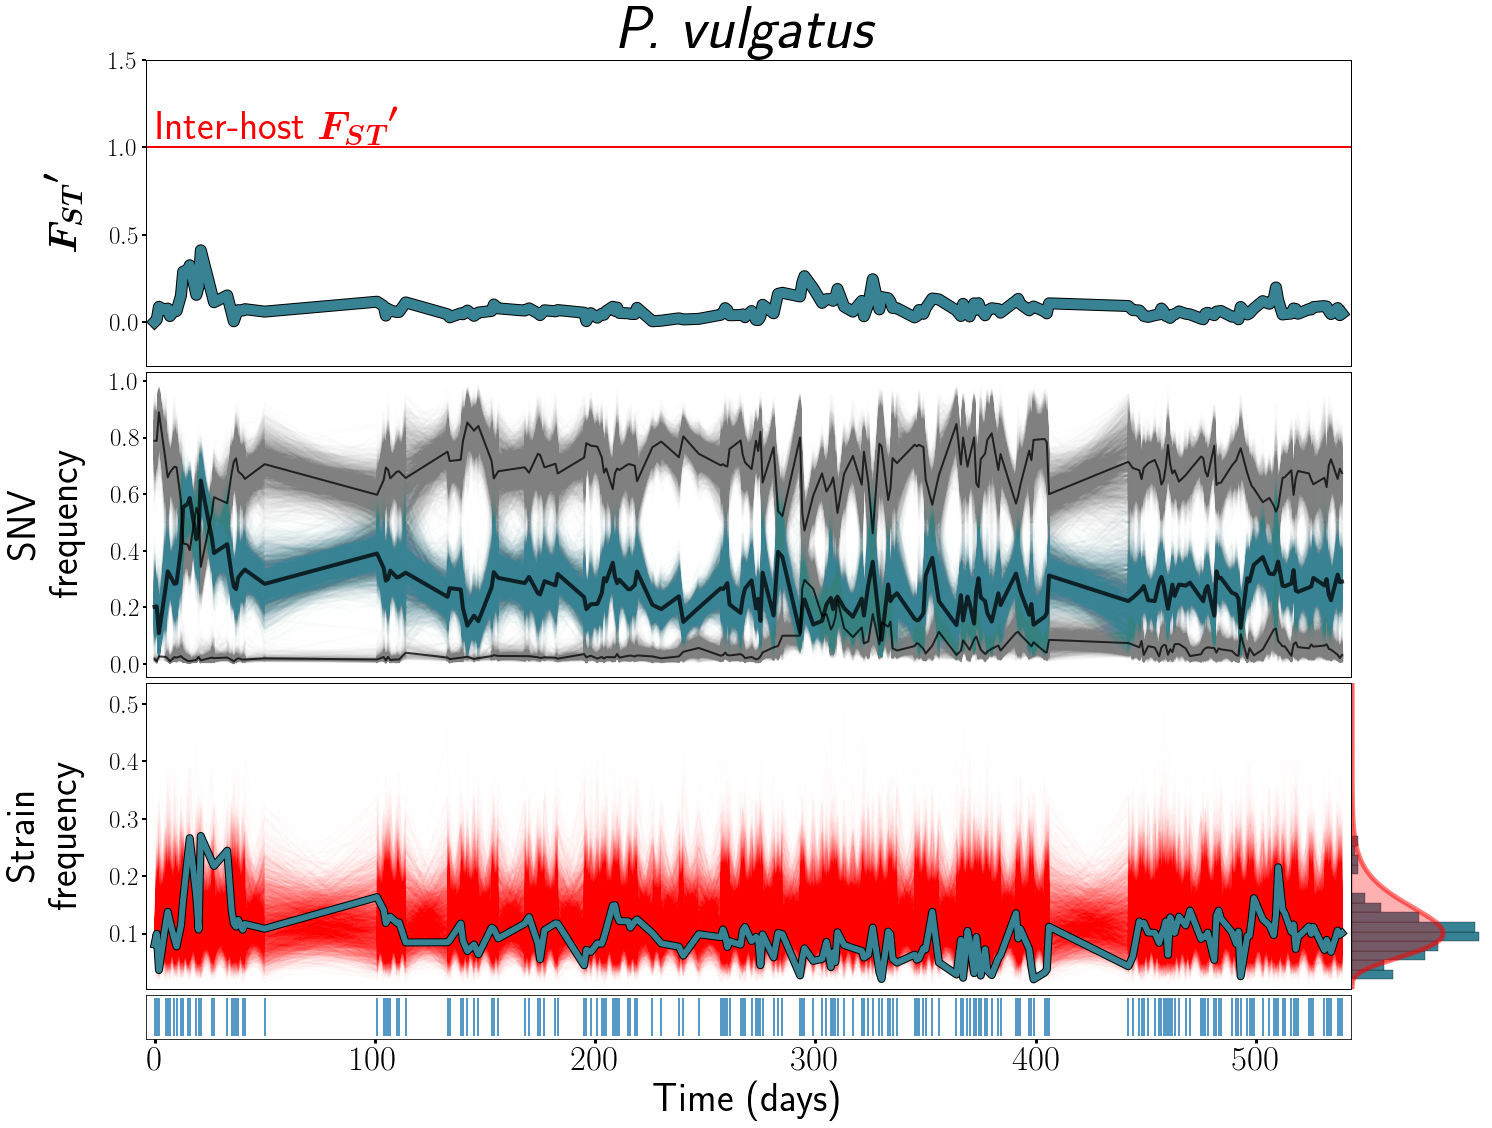

In [87]:
fig = plt.figure(figsize=(24,18))

spec = gridspec.GridSpec(ncols=10, nrows=4, height_ratios = (7,7,7,1), figure=fig,hspace=.025)

plot_fst(ts_all,host,species=species,fst_fig=fig,spec=spec)

plot_snv_fig(chosen_strain,host,species,snv_fig=fig,spec=spec)

plot_slm_fig(host,species,chosen_strain,fig3=fig,spec=spec)

make_sampling_ax(host,species,samp_fig=fig,spec=spec)

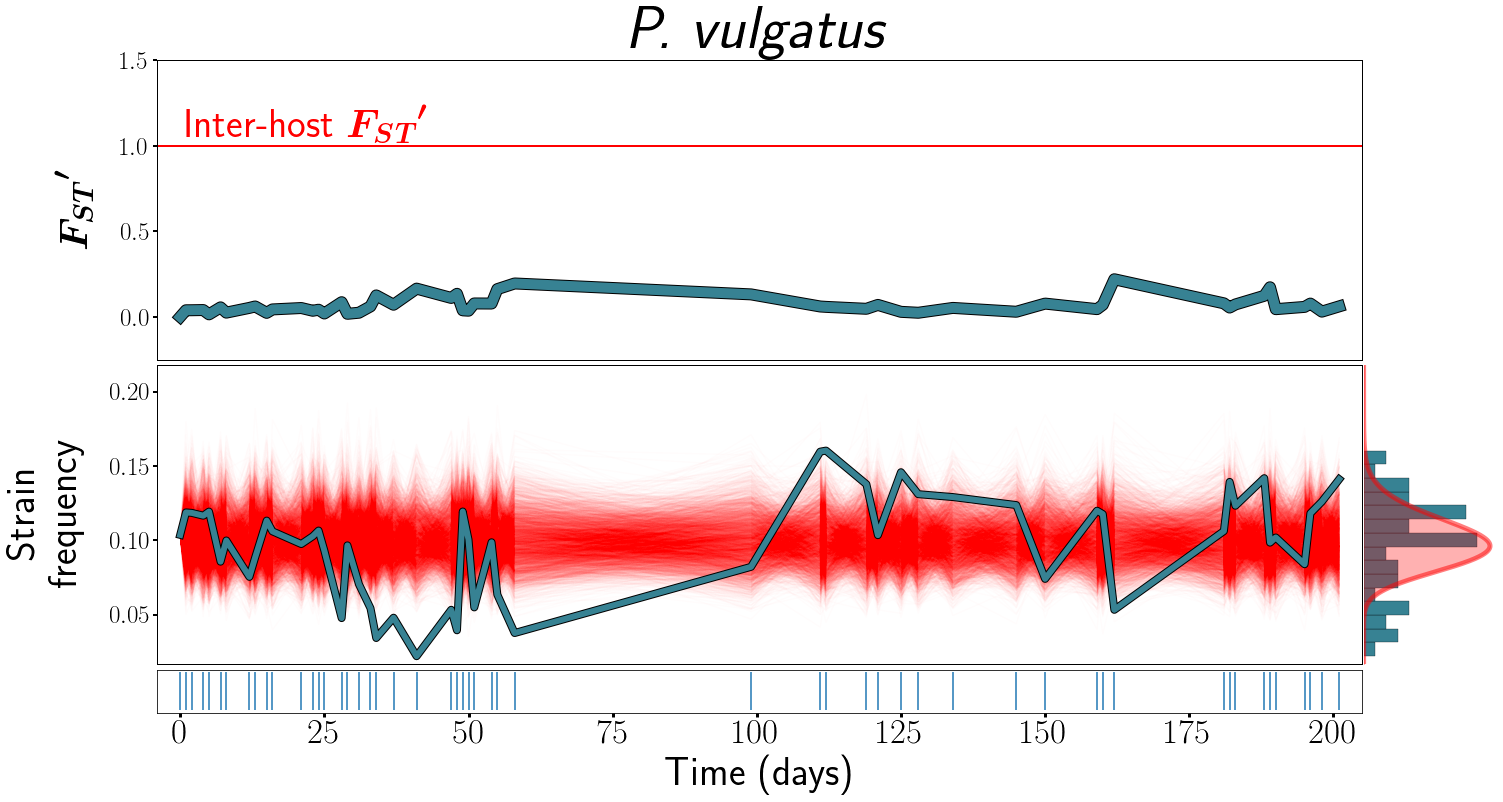

In [28]:
fig = plt.figure(figsize=(24,12))
spec = gridspec.GridSpec(ncols=10, nrows=3, height_ratios = (7,7,1), figure=fig,hspace=.025)

plot_fst(ts_all,host,species=species,fst_fig=fig,spec=spec)

plot_slm_fig(host,species,chosen_strain,fig3=fig,spec=spec,ij=1)

make_sampling_ax(host,species,samp_fig=fig,spec=spec,ij=2)

In [ ]:
fig = plt.figure(figsize=(24,18))
spec = gridspec.GridSpec(ncols=10, nrows=4, height_ratios = (7,7,7,1), figure=fig,hspace=.025)

plot_slm_fig(host,species,chosen_strain,fig3=fig,spec=spec)


In [ ]:
def plot_pi(host,species=None,pi_fig=None,axs=None):
    
    if pi_fig == None:
        pi_fig,axs = plt.subplots(constrained_layout=True,figsize=(24,6))
         
    pi_dir = "%s/pi/Poyet/%s" % (config.analysis_directory,host)
    
    good_species = [s[:-7] for s in os.listdir(pi_dir)]
    dates = mu.return_dates(host)

    axs.set_xlim([-4,dates.iloc[-1] + 4])

    all_samples = mu.return_host_samples(host)
    
    pi_df_W = pd.DataFrame(columns=all_samples,index=good_species)

    for spc in good_species:
        pi_df = pd.read_csv("%s/%s_pi.txt" % (pi_dir,spc),index_col=0)
        pi_df_T = pd.DataFrame(columns=all_samples,index=all_samples)
        pi_df_T.loc[pi_df.index,pi_df.columns] = pi_df
        species_dates = dates.loc[pi_df.index].sort_values()
        first_date = species_dates.index[0]
        pi_df_W.loc[spc] = np.diag(pi_df_T)
 
    pi_df_W = pi_df_W.loc[:,[d for d in dates.index if d in pi_df_W.columns]]
    

    species_samples = pi_df_W.columns
    
    pi_df_W.columns = dates.loc[species_samples]
    
    for spc in pi_df_W.index:
        spc_frq = pi_df_W.loc[spc]
        spc_frq = spc_frq[spc_frq.notna()]
        d = spc_frq.index
        axs.scatter(d,spc_frq.values,color="k",s=20,zorder=100)
   
    pi_df_W.index = [figure_utils.get_pretty_species_name(w) for w in pi_df_W.index]
    pi_df_W.T.fillna(method="backfill").plot(ax=axs,lw=4)
    #axs.scatter(dates.values,Fst_plot.loc[species].values,color="k",s=50,zorder=1000);
        
    axs.semilogy()
    
   # axs.axhline(1,color="k",lw=2)
    #axs.set_ylabel("Population similarity" + "\n" + r"$(1 - F_{ST})$",size=20,labelpad=30)
    
    axs.spines['left'].set_linewidth(3)
    axs.spines['bottom'].set_linewidth(3)
    axs.spines['right'].set_linewidth(3)
    axs.spines['top'].set_linewidth(3)

    axs.tick_params('both', length=7, width=2, which='major',labelsize=40)
    axs.tick_params('both', length=3, width=2, which='minor')
       
    #axs.grid(True,alpha=1)
    axs.set_xlabel("Time (days)",size=40)
    
    axs.tick_params(axis='y', which='major', labelsize=30,bottom="off")
    
    axs.set_ylabel(r"$\pi$",size=40)
    #axs.set_title(host,size=40,fontstyle="italic",fontweight="bold")
    axs.set_ylim([1e-4,1e-2])
    axs.legend(loc='upper left', bbox_to_anchor=(1.0, 1.08),
               ncol=1, fancybox=True, shadow=True,prop={'size': 20,'style':'italic'})
#axs.set_ylim([.05,3])

In [ ]:
def return_pi(host):
    
    pi_dir = "%s/pi/Poyet/%s" % (config.analysis_directory,host)
    
    good_species = [s[:-7] for s in os.listdir(pi_dir)]
    dates = mu.return_dates(host)

    all_samples = mu.return_host_samples(host)
    
    pi_df_W = pd.DataFrame(columns=all_samples,index=good_species)

    for spc in good_species:
        pi_df = pd.read_csv("%s/%s_pi.txt" % (pi_dir,spc),index_col=0)
        pi_df_T = pd.DataFrame(columns=all_samples,index=all_samples)
        pi_df_T.loc[pi_df.index,pi_df.columns] = pi_df
        species_dates = dates.loc[pi_df.index].sort_values()
        first_date = species_dates.index[0]
        pi_df_W.loc[spc] = np.diag(pi_df_T)
 
    pi_df_W = pi_df_W.loc[:,[d for d in dates.index if d in pi_df_W.columns]]
    

    return(pi_df_W)

In [ ]:
fig,axss = plt.subplots(4,1,figsize=(24,28))

axss = axss.ravel()

plot_pi("am",pi_fig=fig,axs=axss[0]);
plot_pi("ao",pi_fig=fig,axs=axss[1]);
plot_pi("an",pi_fig=fig,axs=axss[2]);
plot_pi("ae",pi_fig=fig,axs=axss[3]);

fig.subplots_adjust(hspace=.7)